<a href="https://colab.research.google.com/github/soy-esaul/Metropolis-Hastings_slideshow/blob/main/Metropolis_Hastings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de uso de MCMC: La densidad de Rosenbrock

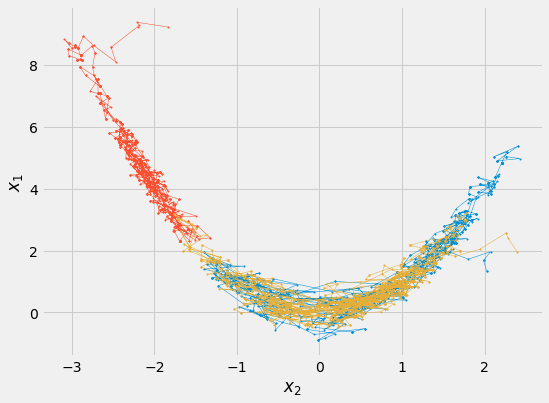

In [29]:
import numpy as np
from   numpy.random import multivariate_normal as mvn
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (8,6)

n_iters    = 1000
samples    = np.empty((n_iters, 2))
samples[0] = np.random.uniform(low=[-3, -3], high=[3, 10], size=2)
rosen      = lambda x, y: np.exp(-((1 - x)**2 + 100*(y - x**2)**2) / 20)

for i in range(1, n_iters):
    curr  = samples[i-1]
    prop  = curr + mvn(np.zeros(2), np.eye(2) * 0.1)
    alpha = rosen(*prop) / rosen(*curr)
    if np.random.uniform() < alpha:
        curr = prop
    samples[i] = curr

plt.plot(samples[:, 0], samples[:, 1], marker='.', linewidth=0.5, markersize=2)


samples[0] = np.random.uniform(low=[-3, -3], high=[3, 10], size=2)
rosen      = lambda x, y: np.exp(-((1 - x)**2 + 100*(y - x**2)**2) / 20)

for i in range(1, n_iters):
    curr  = samples[i-1]
    prop  = curr + mvn(np.zeros(2), np.eye(2) * 0.1)
    alpha = rosen(*prop) / rosen(*curr)
    if np.random.uniform() < alpha:
        curr = prop
    samples[i] = curr

plt.plot(samples[:, 0], samples[:, 1], marker='.', linewidth=0.5, markersize=2)


samples[0] = np.random.uniform(low=[-3, -3], high=[3, 10], size=2)
rosen      = lambda x, y: np.exp(-((1 - x)**2 + 100*(y - x**2)**2) / 20)

for i in range(1, n_iters):
    curr  = samples[i-1]
    prop  = curr + mvn(np.zeros(2), np.eye(2) * 0.1)
    alpha = rosen(*prop) / rosen(*curr)
    if np.random.uniform() < alpha:
        curr = prop
    samples[i] = curr

plt.plot(samples[:, 0], samples[:, 1], marker='.', linewidth=0.5, markersize=2)

plt.ylabel(r"$x_1$")
plt.xlabel(r"$x_2$")
plt.show()


# Ejemplo de MCMC unidimensional: La distribución de Rayleigh

La distribución de Rayleigh se usa para modelar timepos de vida sujetos a un envejecimiento rápido

$$ \displaystyle f(x) = \frac{x}{\sigma^2} e^{-x^2/2\sigma^2}, \quad x \ge 0, \sigma > 0.$$





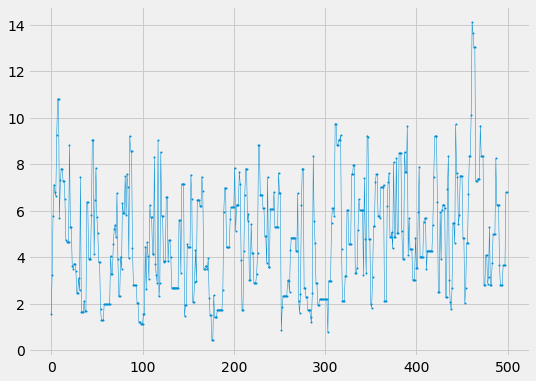

In [75]:
from scipy.stats import chi2


n_iters_r  = 5000
samples_r  = np.empty((n_iters_r, 1))
samples_r[0] = np.random.chisquare(df=1)

def rayleigh(x,sigma):
  if x.any() < 0:
    return 0
  if sigma <= 0:
    return 0
  ray = (x / sigma**2) * np.exp(-x**2 / (2*sigma**2) )
  return ray


sigma = 4

for i in range(1, n_iters_r):
    curr_r  = samples_r[i-1]
    prop_r  = np.random.chisquare(df=curr_r)
    alpha = (rayleigh(prop_r, sigma)*chi2.pdf(curr_r, df=prop_r)) / ( rayleigh(curr_r, sigma)*chi2.pdf(prop_r, df=curr_r) )
    if np.random.uniform() < alpha:
        curr_r = prop_r
    samples_r[i] = curr_r

plt.plot(samples_r[0:500], marker='.', linewidth=0.5, markersize=2)

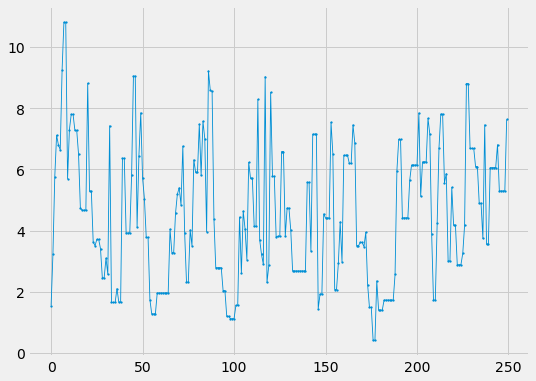

In [81]:
plt.plot(samples_r[0:250], marker='.', linewidth=0.85, markersize=2.5)

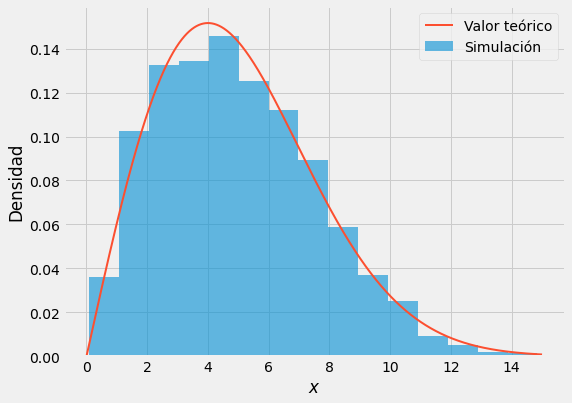

In [76]:
ax = np.linspace(0, 15, num=len(samples_r))

ax_r = []

for i in ax:
  new = rayleigh(i,sigma)
  ax_r.append(new)

plt.hist(samples_r, alpha=0.6, bins=15, density=True, label="Simulación")
plt.plot(ax,ax_r, label="Valor teórico", linewidth=2)
plt.xlabel("$x$")
plt.ylabel("Densidad")
plt.legend()
plt.show()